In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# 1. Pendulum


다음처럼 주어지는 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2}  + \frac{g}{L} \sin \theta = 0. $$$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도이다. 흔히 작은 $\theta$를 가정하고 $\sin\theta \approx \theta$ 근사를 이용하여 해석적인 해를 구한다. 여기에서는 $\sin \theta$를 직접 이용하여 수치해를 구해보자.

2차 미분방정식을 2개의 1차 미분방정식으로 분리하자.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} = - \frac{g}{L} \sin \theta . $$

$\frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다.



In [2]:
gL=1 # gL = g/L
𝜃0, 𝑤0 = 1, 0
dt = 0.1
t=np.arange(0.0, 100.0, dt)
𝜃 = np.array([])
𝑤 = np.array([])

for i in t:
    𝜃0 = 𝜃0 + dt*𝑤0
    𝑤0 = 𝑤0 - dt*gL*np.sin(𝜃0)
    𝜃 = np.append(𝜃,𝜃0)
    𝑤 = np.append(𝑤,𝑤0)
    

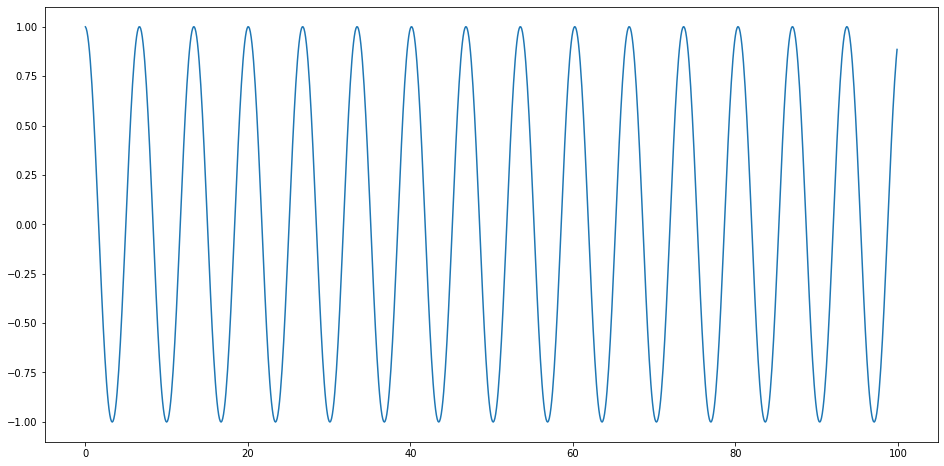

In [3]:
plt.figure(figsize=(16,8))
plt.plot(t,𝜃)

In [4]:
# scipy.integrate.odeint 를 사용해보자

gL=1
state0 = [1, 0] 
t = np.arange(0.0, 100.0, 0.1)

def f(state, t):
    𝜃, 𝑤 = state 
    return 𝑤, - gL*np.sin(𝜃)


sol = odeint(f, state0, t)

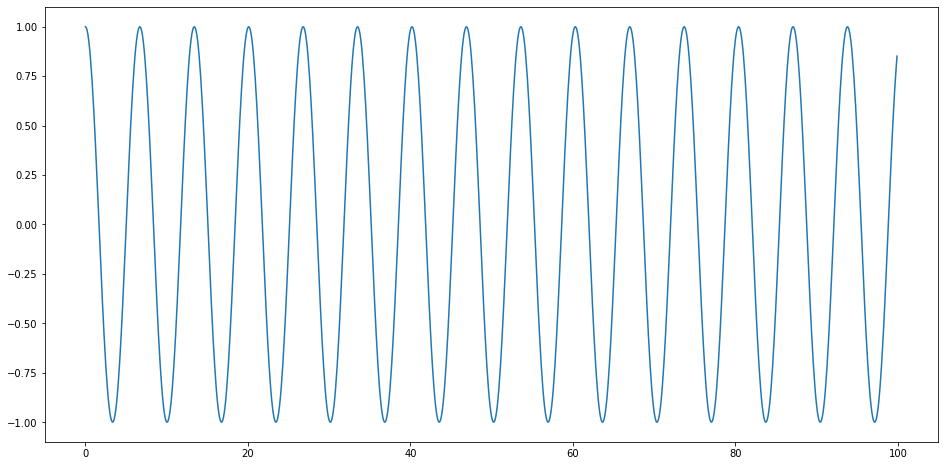

In [5]:
plt.figure(figsize=(16,8))
plt.plot(t,sol[:,0])

# 2. Pendulum (small oscillations)


1번 문제와 같은 진자에 대해 평형점 근처에서 조금씩 진동하고 있는 상황을 고려하자. 그러면
$\sin\theta \approx \theta$ 근사를 적용할 수 있다.

이 경우는 다음과 같은 2개의 1차 미분방정식을 얻는다.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} =  - \frac{g}{L} \theta . $$

$\frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다. 초기 조건 $\theta_o, w_o$를 바꾸어 가면서 1번 문제의 결과와 비교해보자.

In [6]:
# 1번 에서, sin𝜃를 𝜃 로 바꿔서 진행하면 된다.
gL=1
𝜃0, 𝑤0 = 1, 0
dt = 0.1
t=np.arange(0.0, 100.0, dt)
𝜃 = np.array([])
𝑤 = np.array([])

for i in t:
    𝜃0 = 𝜃0 + dt*𝑤0
    𝑤0 = 𝑤0 - dt*gL*𝜃0
    𝜃 = np.append(𝜃,𝜃0)
    𝑤 = np.append(𝑤,𝑤0)

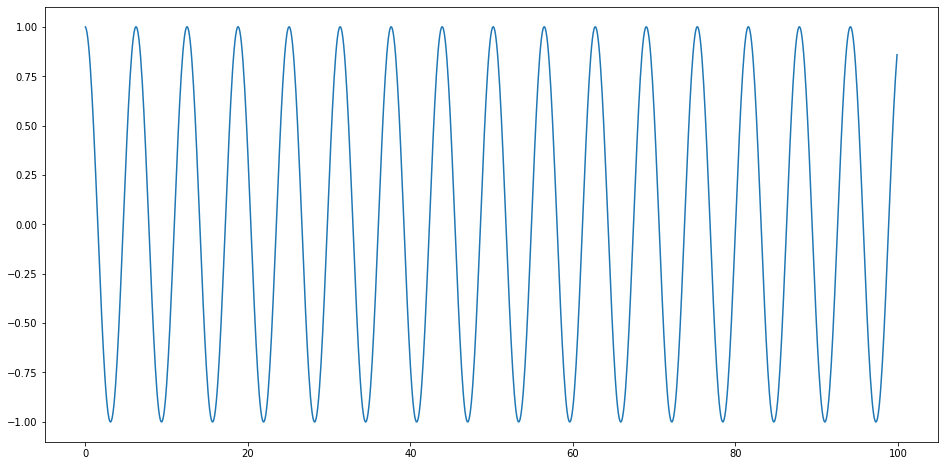

In [7]:
plt.figure(figsize=(16,8))
plt.plot(t,𝜃)
# 1번에서와 동일한 모양의 그래프를 확인할 수 있다.

In [8]:
# scipy.integrate.odeint 를 사용해보아도 결과는 같다.

gL=1
state0 = [1, 0] 
t = np.arange(0.0, 100.0, 0.1)

def f(state, t):
    𝜃, 𝑤 = state 
    return 𝑤, - gL*𝜃

sol = odeint(f, state0, t)

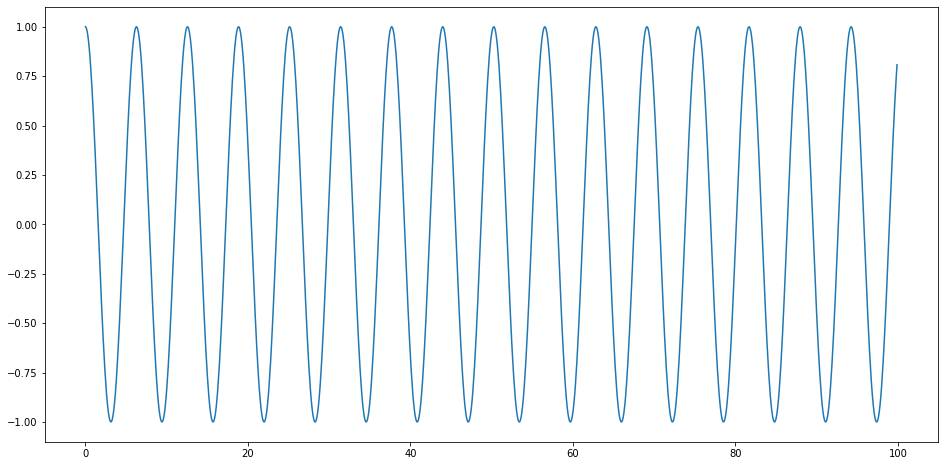

In [9]:
plt.figure(figsize=(16,8))
plt.plot(t,sol[:,0])

# 3. Damped Pendulum


다음처럼 주어지는 damped 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2} + \beta \frac{d \theta}{dt} + \frac{g}{L} \sin \theta = 0. $$$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도이다.

우선 2차 미분방정식을 2개의 1차 미분방정식으로 분리해 보자.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} = - \beta w - \frac{g}{L} \sin \theta . $$

초기 상태는 $\theta_0 = 1, w_0 =0$이며 $\beta=0.1, \frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다.

In [10]:
beta, gL = 0.1, 1 
𝜃0, 𝑤0 = 1, 0
dt=0.1
t = np.arange(0.0, 100.0, dt)
𝜃 = np.array([])
𝑤 = np.array([])

for i in t:
    𝜃0 = 𝜃0 + dt*𝑤0
    𝑤0 = 𝑤0 - dt*beta*𝑤0 - dt*gL*np.sin(𝜃0)
    𝜃 = np.append(𝜃,𝜃0)
    𝑤 = np.append(𝑤,𝑤0)

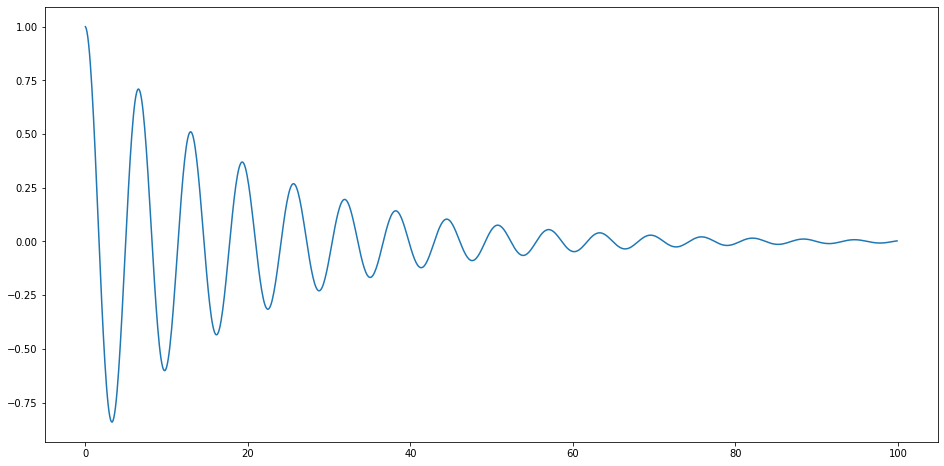

In [11]:
plt.figure(figsize=(16,8))
plt.plot(t,𝜃)
# 점점 감쇄하는 모양의 그래프를 얻을 수 있다. (beta의 존재에 의한 결과)

In [12]:
# scipy.integrate.odeint 를 사용해보자

gL=1
state0 = [1, 0] 
t = np.arange(0.0, 100.0, 0.1)

def f(state, t):
    𝜃, 𝑤 = state 
    return 𝑤, -beta*𝑤 - gL*np.sin(𝜃)


sol = odeint(f, state0, t)

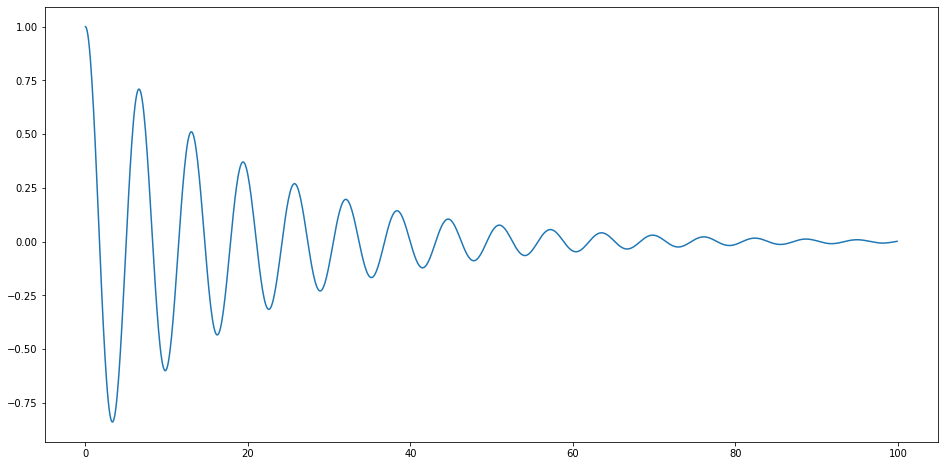

In [13]:
plt.figure(figsize=(16,8))
plt.plot(t,sol[:,0])
# 위와 동일한 형태의 그래프를 얻을 수 있다.

# 4. Forced Pendulum


다음처럼 주어지는 forced 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2} + \beta \frac{d \theta}{dt} + \frac{g}{L} \sin \theta = A \cos (v t). $$$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도, $A$는 외부에서 주어지는 힘의 진폭, $v$는 외부에서 주어지는 힘의 진동수이다.

forced 진자의 움직임을 구해보고 $v$의 효과에 대해 살펴보아라.

In [14]:
# v=3 이라고 해보자
gL=1
state0 = [1, 0] 
t = np.arange(0.0, 100.0, 0.1)

def f(state, t):
    𝜃, 𝑤 = state 
    return 𝑤, -beta*𝑤 - gL*np.sin(𝜃) + A*np.cos(3*t)

sol = odeint(f, state0, t)

NameError: name 'A' is not defined

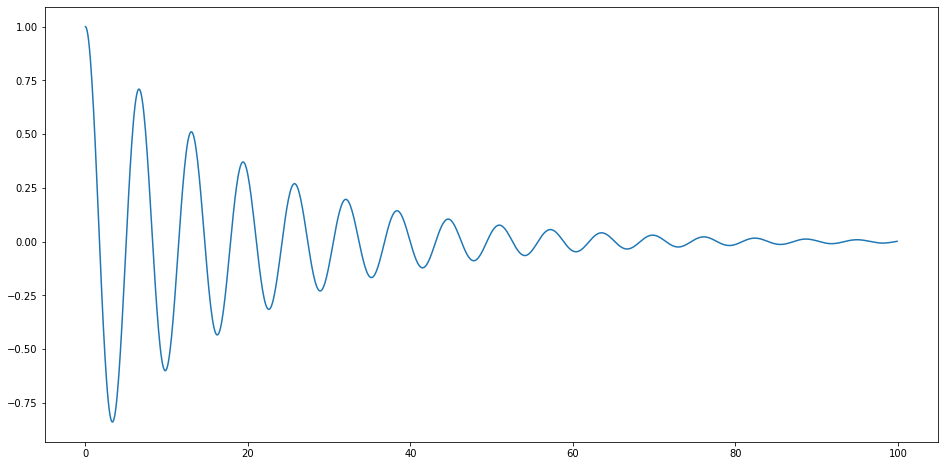

In [15]:
plt.figure(figsize=(16,8))
plt.plot(t,sol[:,0])

In [16]:
# v=10 이라 해보자
gL=1
state0 = [1, 0] 
t = np.arange(0.0, 100.0, 0.1)

def f(state, t):
    𝜃, 𝑤 = state 
    return 𝑤, -beta*𝑤 - gL*np.sin(𝜃) + A*np.cos(10*t)

sol = odeint(f, state0, t)

plt.figure(figsize=(16,8))
plt.plot(t,sol[:,0])

NameError: name 'A' is not defined

In [17]:
# v=50 이라 해보자
gL=1
state0 = [1, 0] 
t = np.arange(0.0, 100.0, 0.1)

def f(state, t):
    𝜃, 𝑤 = state 
    return 𝑤, -beta*𝑤 - gL*np.sin(𝜃) + A*np.cos(50*t)

sol = odeint(f, state0, t)

plt.figure(figsize=(16,8))
plt.plot(t,sol[:,0])

NameError: name 'A' is not defined

v가 커지면 커질수록, 감쇄로 인해 0으로 수렴하는 정도가 빨라짐을 그래프를 통해 확인할 수 있습니다.

-4

2번의 경우 초기값을 변화시키면서 theta를 썼을 때와 np.sin(theta)를 썼을 때의 결과를 비교해야 함